In [1]:
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_aw_custs = pd.read_csv('./AdvWorksCusts.csv')
df_aw_spend = pd.read_csv('./AW_AveMonthSpend.csv')
df_aw_bike_buyer = pd.read_csv('./AW_BikeBuyer.csv')

In [3]:
print(df_aw_custs.head())
print(df_aw_spend.head())
print(df_aw_bike_buyer.head())

   CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland   
1           2243 W St.          NaN      Seaford          Victoria   
2     5844 Linden Land          NaN       Hobart          Tasmania   
3     1825 Village Pl.          NaN   North Ryde   New South Wales   
4  7553 Harness Circle          NaN   Wollongong   New South Wales   

       ...        BirthDate   Education    Occupation Gender MaritalStatus  \
0      ...       1966-04-08  Bachelors   Professional      M             M   
1      ...       1965-05-14  Bachelors   Professional   

In [4]:
print(df_aw_spend.describe())
print(df_aw_spend.shape)
print(df_aw_spend.CustomerID.unique().shape)

         CustomerID  AveMonthSpend
count  16519.000000   16519.000000
mean   20234.225195      72.405957
std     5342.515987      27.285370
min    11000.000000      22.000000
25%    15604.500000      52.000000
50%    20221.000000      68.000000
75%    24860.500000      84.000000
max    29482.000000     176.000000
(16519, 2)
(16404,)


In [5]:
df_aw_spend.drop_duplicates(inplace=True, keep='last', subset="CustomerID")


In [6]:
df_aw_spend.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.391002
std,5340.370705,27.269921
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


In [7]:
df_aw_spend.AveMonthSpend.mean()

72.39100219458669

In [8]:
df_aw_spend.AveMonthSpend.median()

68.0

In [9]:
print(df_aw_bike_buyer.describe())
print(df_aw_bike_buyer.shape)
print(df_aw_bike_buyer.CustomerID.unique().shape)

         CustomerID     BikeBuyer
count  16519.000000  16519.000000
mean   20234.225195      0.332284
std     5342.515987      0.471046
min    11000.000000      0.000000
25%    15604.500000      0.000000
50%    20221.000000      0.000000
75%    24860.500000      1.000000
max    29482.000000      1.000000
(16519, 2)
(16404,)


In [10]:
df_aw_bike_buyer.drop_duplicates(inplace=True, keep='last', subset="CustomerID")

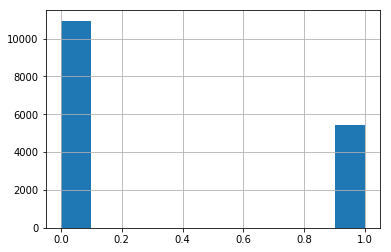

In [11]:
df_aw_bike_buyer.BikeBuyer.hist()

In [12]:
print(df_aw_custs.shape)
print(df_aw_custs.CustomerID.unique().shape)

(16519, 23)
(16404,)


In [13]:
df_aw_custs.drop_duplicates(inplace=True, keep='last', subset="CustomerID")

In [14]:
df_aw_custs[["YearlyIncome", "Occupation"]].groupby("Occupation").median()

,YearlyIncome
Occupation,
Clerical,49481.0
Management,118781.0
Manual,21722.0
Professional,99058.0
Skilled Manual,66471.5


In [15]:
df_aw_spend.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [16]:
df_aw_custs.set_index("CustomerID", inplace=True)
df_aw_spend.set_index("CustomerID", inplace=True)

In [17]:
print(df_aw_spend.head())

df_joined = df_aw_custs.join(df_aw_spend)
print(df_joined[["AveMonthSpend"]].head())

            AveMonthSpend
CustomerID               
11000                  89
11001                 117
11002                 123
11003                  50
11004                  95
            AveMonthSpend
CustomerID               
11000                  89
11001                 117
11002                 123
11003                  50
11004                  95


In [18]:
print(df_joined.columns)
df_joined[["Gender", "AveMonthSpend", "BirthDate"]]
df_joined.dtypes
df_joined["Age"] = (pd.Timestamp("1998-01-01") - pd.to_datetime(df_joined["BirthDate"])).astype('<m8[Y]').astype("int")

Index(['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend'],
      dtype='object')


In [19]:
def age_group(age):
    if age < 25:
        return "<25"
    elif age < 45:
        return "25-45"
    elif age < 55:
        return "45-55"
    else:
        return ">=55"

In [20]:
df_joined["AgeGroup"] = df_joined["Age"].map(age_group)

In [52]:
df_joined[["AgeGroup", "BikeBuyer"]].groupby("AgeGroup").count()


,BikeBuyer
AgeGroup,
25-45,9981
45-55,2437
<25,2932
>=55,1054


In [61]:
df_bikebuyers = df_joined[df_joined.BikeBuyer == 1]

ValueError: Could not interpret input 'BikeBuyer'

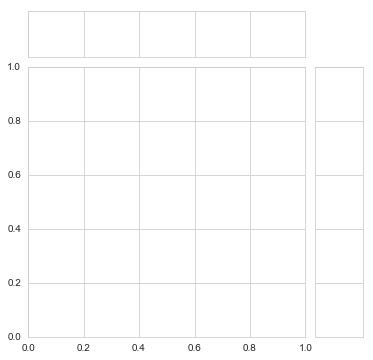

In [58]:
sns.jointplot(df_joined[df_joined["BikeBuyer"]==1],y="BikeBuyer")

In [22]:
df_joined[["AgeGroup", "AveMonthSpend", "Gender"]].groupby(["AgeGroup", "Gender"]).sum()

AveMonthSpend
AgeGroup Gender               
25-45    F              293929
         M              473092
45-55    F               70079
         M              109613
<25      F               70476
         M              107683
>=55     F               24935
         M               37695

In [23]:
df_joined[["AgeGroup", "AveMonthSpend", "Gender"]].groupby(["AgeGroup", "Gender"]).describe()

AveMonthSpend                                                  \
                        count       mean        std   min   25%   50%     75%   
AgeGroup Gender                                                                 
25-45    F             4914.0  59.814611  16.599226  32.0  48.0  54.0   67.00   
         M             5067.0  93.367278  27.378939  50.0  75.0  83.0  107.00   
45-55    F             1210.0  57.916529  16.933641  29.0  47.0  53.0   61.00   
         M             1227.0  89.334148  27.229150  51.0  71.0  82.0   95.00   
<25      F             1456.0  48.403846  11.892605  30.0  42.0  46.0   51.00   
         M             1476.0  72.955962  18.502554  50.0  63.0  69.0   76.25   
>=55     F              534.0  46.694757  11.965024  22.0  40.0  45.0   49.00   
         M              520.0  72.490385  19.671775  29.0  62.0  69.0   75.00   

                        
                   max  
AgeGroup Gender         
25-45    F       114.0  
         M       176.0  
45-55    F       110.0  
         M       170.0  
<25      F       112.0  
         M       176.0  
>=55     F        93.0  
         M       147.0

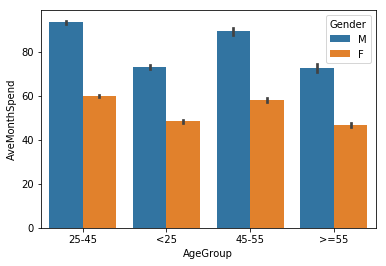

In [24]:
sns.barplot(data=df_joined[["AgeGroup", "AveMonthSpend", "Gender"]], y="AveMonthSpend", x="AgeGroup", hue="Gender")

In [25]:
def plot_box(auto_prices, cols, col_y = 'price'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=auto_prices, palette='RdBu_r')
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        

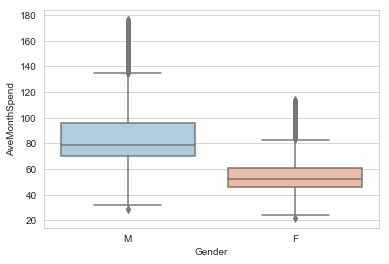

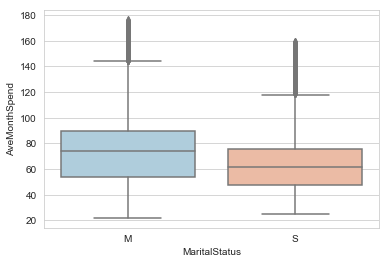

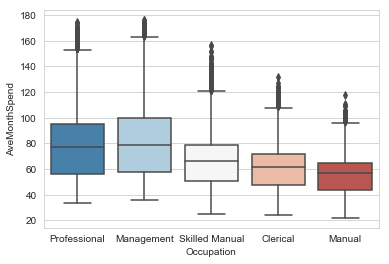

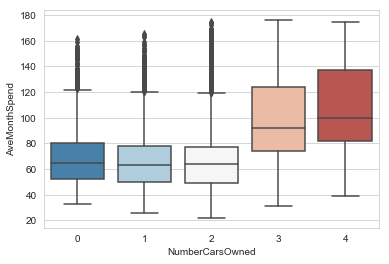

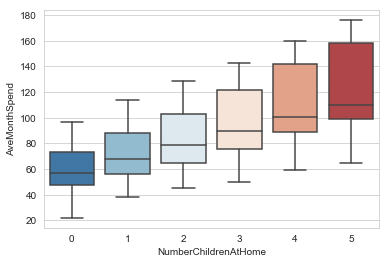

In [26]:
cat_cols = ['Gender', 'MaritalStatus', 'Occupation', 'NumberCarsOwned', 'NumberChildrenAtHome']
plot_box(df_joined, cat_cols, col_y="AveMonthSpend")    

In [27]:
df_aw_bike_buyer.set_index("CustomerID", inplace=True)
df_joined = df_joined.join(df_aw_bike_buyer)


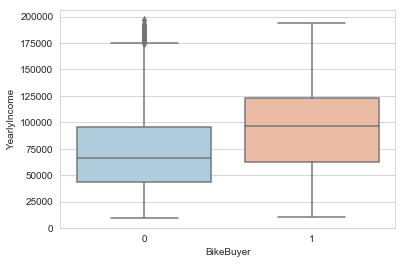

In [28]:
cat_cols = ['BikeBuyer']
plot_box(df_joined, cat_cols, col_y="YearlyIncome")    

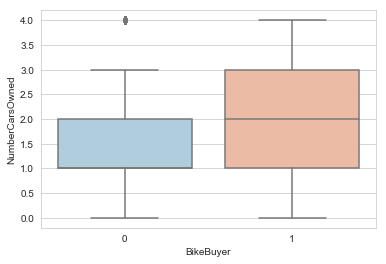

In [29]:
cat_cols = ['BikeBuyer']
plot_box(df_joined, cat_cols, col_y="NumberCarsOwned")

In [30]:
df_joined[['BikeBuyer', 'NumberCarsOwned']].groupby('BikeBuyer').median()


,NumberCarsOwned
BikeBuyer,
0,1
1,2


In [31]:
df_joined[['BikeBuyer', 'Occupation']].groupby('Occupation').describe()

BikeBuyer                                             
                   count      mean       std  min  25%  50%  75%  max
Occupation                                                           
Clerical          2597.0  0.237197  0.425446  0.0  0.0  0.0  0.0  1.0
Management        2718.0  0.373804  0.483902  0.0  0.0  0.0  1.0  1.0
Manual            2129.0  0.236731  0.425176  0.0  0.0  0.0  0.0  1.0
Professional      4922.0  0.443722  0.496873  0.0  0.0  0.0  1.0  1.0
Skilled Manual    4038.0  0.281080  0.449582  0.0  0.0  0.0  1.0  1.0

In [32]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

In [33]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

In [34]:
print(df_joined.head())
print(df_joined.columns)


           Title  FirstName MiddleName LastName Suffix         AddressLine1  \
CustomerID                                                                    
11000        NaN        Jon          V     Yang    NaN      3761 N. 14th St   
11001        NaN     Eugene          L    Huang    NaN           2243 W St.   
11002        NaN      Ruben        NaN   Torres    NaN     5844 Linden Land   
11003        NaN    Christy        NaN      Zhu    NaN     1825 Village Pl.   
11004        NaN  Elizabeth        NaN  Johnson    NaN  7553 Harness Circle   

           AddressLine2         City StateProvinceName CountryRegionName  \
CustomerID                                                                 
11000               NaN  Rockhampton        Queensland         Australia   
11001               NaN      Seaford          Victoria         Australia   
11002               NaN       Hobart          Tasmania         Australia   
11003               NaN   North Ryde   New South Wales         Aus

In [35]:
labels = np.array(df_joined['BikeBuyer'])

In [36]:
df_joined[["YearlyIncome","MaritalStatus", "Gender", "NumberCarsOwned", "Age", "AveMonthSpend"]].head()

,YearlyIncome,MaritalStatus,Gender,NumberCarsOwned,Age,AveMonthSpend
CustomerID,,,,,,
11000,137947,M,M,0,31,89
11001,101141,S,M,1,32,117
11002,91945,M,M,1,32,123
11003,86688,S,F,1,29,50
11004,92771,S,F,4,29,95


In [37]:
cols = ["MaritalStatus", "Gender"]
encoded = encode_string(cat_features=cols)


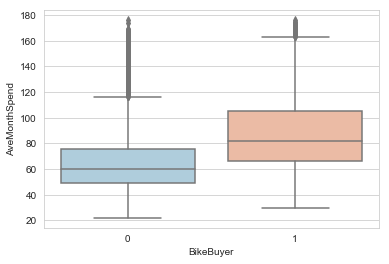

In [38]:
cat_cols = ['BikeBuyer']
plot_box(df_joined, cat_cols, col_y="AveMonthSpend")

In [39]:
encoded

array([[0., 1.],
       [1., 0.]])

In [ ]:
sns.barplot(data=df_joined[["AgeGroup", "AveMonthSpend", "Gender"]], y="AveMonthSpend", x="AgeGroup", hue="Gender")

In [40]:
Features = encode_string(df_joined['MaritalStatus'])
temp = encode_string(df_joined['Gender'])
Features = np.concatenate([Features, temp], axis = 1)


In [41]:
Features.shape

(16404, 4)

In [42]:
df_joined.shape

(16404, 26)

In [43]:
Features = np.concatenate([Features, np.array(df_joined[["YearlyIncome","Age", "AveMonthSpend", "NumberCarsOwned"]])], axis = 1)

In [44]:
Features[:20, :]

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.37947e+05,
        3.10000e+01, 8.90000e+01, 0.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.01141e+05,
        3.20000e+01, 1.17000e+02, 1.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 9.19450e+04,
        3.20000e+01, 1.23000e+02, 1.00000e+00],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 8.66880e+04,
        2.90000e+01, 5.00000e+01, 1.00000e+00],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 9.27710e+04,
        2.90000e+01, 9.50000e+01, 4.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.03199e+05,
        3.20000e+01, 7.80000e+01, 1.00000e+00],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 8.47560e+04,
        3.20000e+01, 5.40000e+01, 1.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.09759e+05,
        3.30000e+01, 1.30000e+02, 2.00000e+00],
       [0.00000e+00, 1.00000e+00

In [45]:
nr.seed(9988)
size = (int(Features.shape[0] * 0.3))
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = size)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
X_train[:10]

array([[1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 4.70040e+04,
        4.20000e+01, 5.20000e+01, 1.00000e+00],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 7.57340e+04,
        5.50000e+01, 4.80000e+01, 1.00000e+00],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 3.65450e+04,
        3.60000e+01, 4.50000e+01, 0.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 2.48570e+04,
        3.00000e+01, 8.90000e+01, 1.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.11521e+05,
        5.40000e+01, 8.20000e+01, 2.00000e+00],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 4.53490e+04,
        2.10000e+01, 4.80000e+01, 2.00000e+00],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 3.72290e+04,
        2.10000e+01, 4.20000e+01, 2.00000e+00],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 8.08950e+04,
        2.10000e+01, 5.50000e+01, 3.00000e+00],
       [0.00000e+00, 1.00000e+00

In [46]:
scaler = preprocessing.StandardScaler().fit(X_train[:,4:])
X_train[:,4:] = scaler.transform(X_train[:,4:])
X_test[:,4:] = scaler.transform(X_test[:,4:])
X_train[:10,]

array([[ 1.        ,  0.        ,  1.        ,  0.        , -0.78348211,
         0.58391818, -0.74500714, -0.44342655],
       [ 0.        ,  1.        ,  1.        ,  0.        , -0.05999597,
         1.74358987, -0.89173791, -0.44342655],
       [ 0.        ,  1.        ,  1.        ,  0.        , -1.04686329,
         0.0486851 , -1.00178598, -1.32088082],
       [ 0.        ,  1.        ,  0.        ,  1.        , -1.34119347,
        -0.48654799,  0.61225241, -0.44342655],
       [ 1.        ,  0.        ,  0.        ,  1.        ,  0.84120134,
         1.65438436,  0.35547358,  0.43402771],
       [ 0.        ,  1.        ,  1.        ,  0.        , -0.82515873,
        -1.28939762, -0.89173791,  0.43402771],
       [ 1.        ,  0.        ,  1.        ,  0.        , -1.02963863,
        -1.28939762, -1.11183405,  0.43402771],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.06996964,
        -1.28939762, -0.63495907,  1.31148198],
       [ 0.        ,  1.        

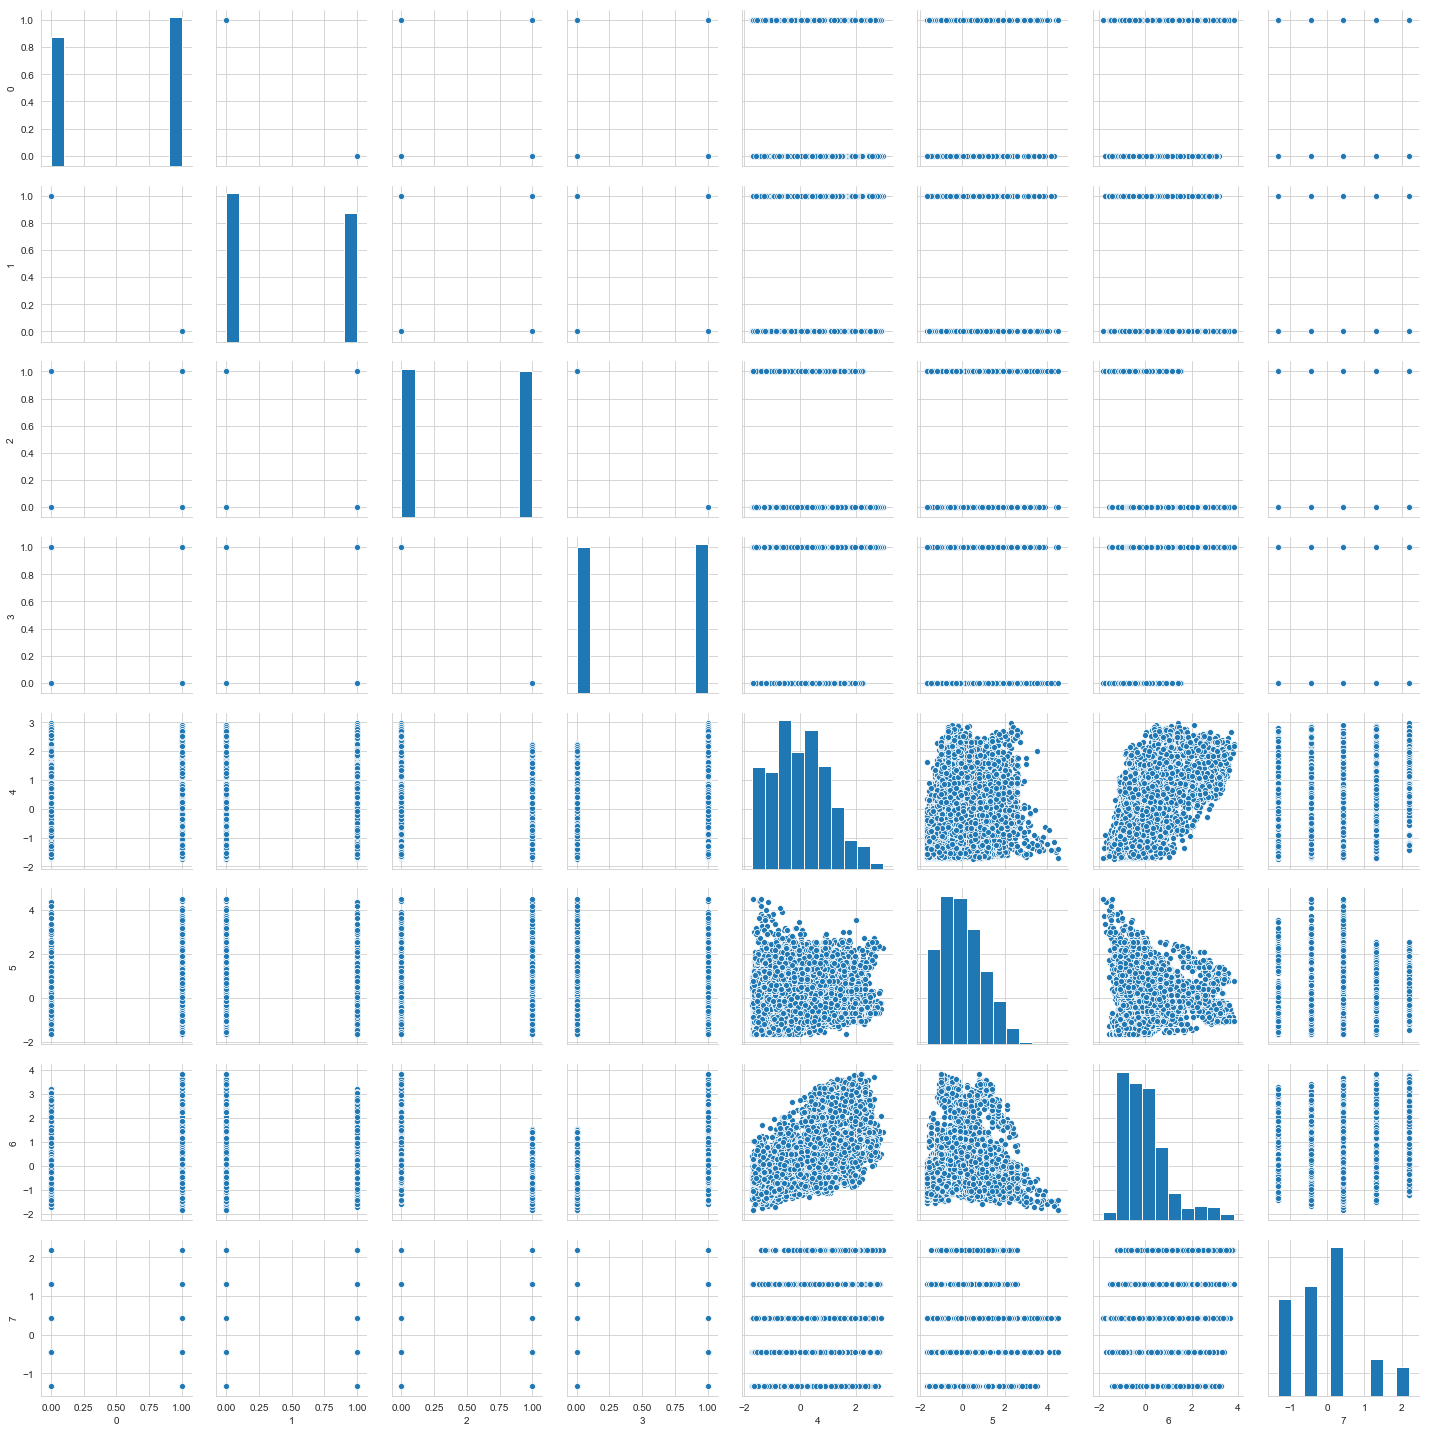

In [47]:
sns.pairplot(pd.DataFrame(X_train))

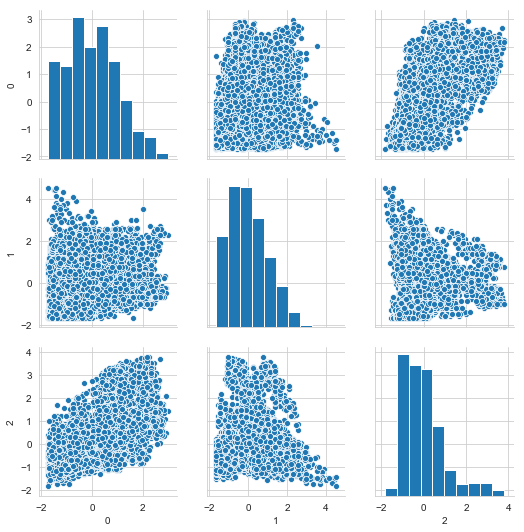

In [48]:
sns.pairplot(pd.DataFrame(X_train[:,4:7]))

In [49]:
import sklearn.metrics as sklm
import sklearn.decomposition as skde

In [50]:
pca_model = skde.PCA()
pca_fit = pca_model.fit(X_train[:,4:7])
print(pca_fit.explained_variance_ratio_)

[0.54306601 0.33175118 0.1251828 ]


(11483, 8)
(11483, 8)


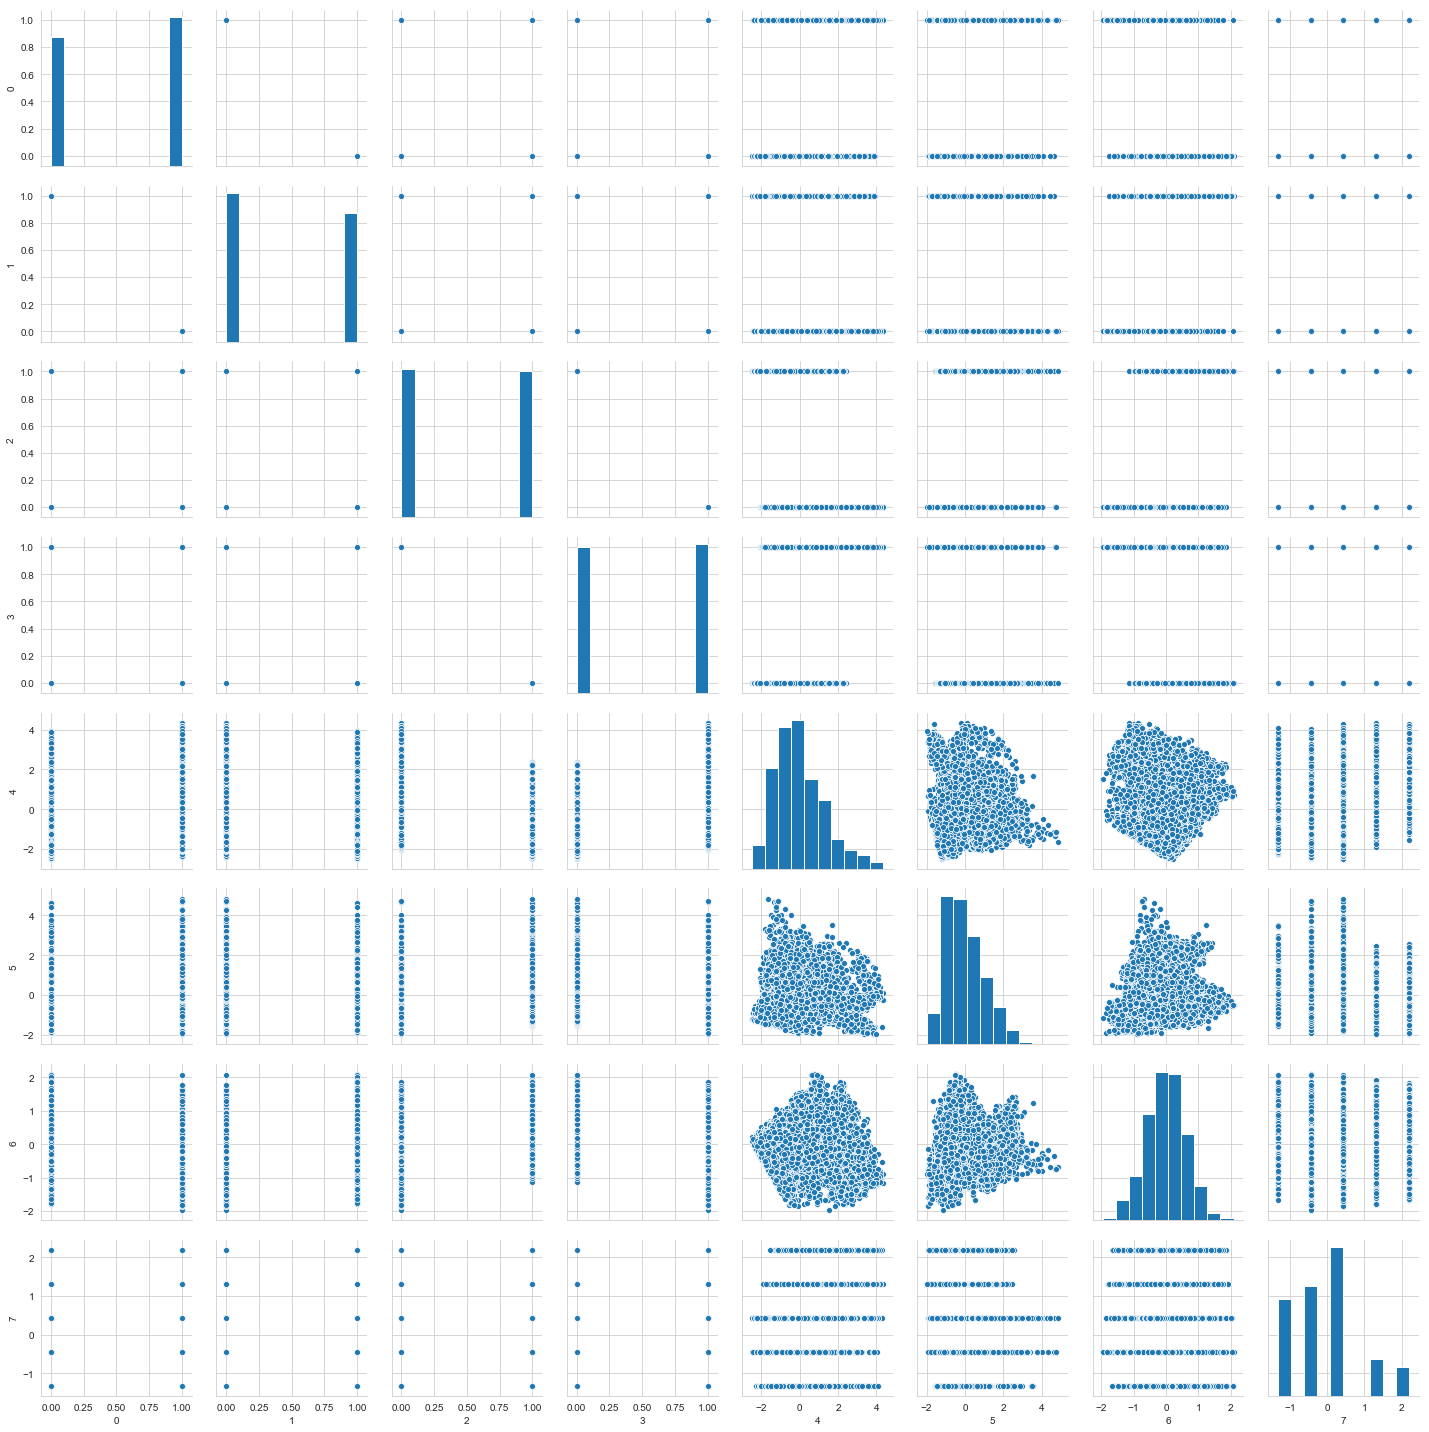

In [51]:
transformed_X = pca_fit.transform(X_train[:,4:7])
transformed_X = np.concatenate([X_train[:,0:4], transformed_X,X_train[:,7:]], axis=1)
print(X_train.shape)
print(transformed_X.shape)
sns.pairplot(pd.DataFrame(transformed_X))